In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns


##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 
# shuffling
data.sample(frac=1, random_state=5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price
523,0.170594,0.652747,-0.512407,0.804988,0.585092,0.627503,0.212932,0.770662,0.599774,1.579795,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,1.747336
2588,3.688452,-2.248352,-0.512407,-0.631596,-1.546430,-1.013221,-1.275533,-2.533469,2.339801,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-4.064330,-0.658056
2603,0.086289,-0.072527,-0.512407,-0.598187,-1.497986,0.054733,-0.889885,0.289059,0.359217,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.400359
1422,0.077082,0.652747,-0.512407,0.738170,0.439761,1.268731,-0.772612,0.396880,0.172117,1.320698,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,1.167840
973,-0.842843,0.652747,-0.512407,0.938624,0.730423,0.449510,-1.203365,-0.920938,-1.297953,0.865529,...,-0.286942,-0.136621,-0.2253,-0.214192,3.724020,-0.127929,-0.152629,-0.091644,0.584308,-0.204820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,-0.437512,-0.797802,1.289025,-1.132730,-1.691761,-1.013221,0.799297,-0.329118,-0.546881,-0.789421,...,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-1.740011,-0.790790
2121,-0.654709,-0.072527,2.189741,-2.068180,-1.691761,-1.013221,0.519646,-0.626226,-0.891679,1.040594,...,3.483094,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.690431
1424,-0.338232,-0.797802,1.289025,-1.065912,0.342874,0.150575,-0.648573,-0.645394,-0.947809,-0.789421,...,3.483094,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.800502
1725,-0.221758,-0.072527,1.289025,0.303854,-0.190007,-1.013221,-1.275533,-2.533469,-0.520152,1.353377,...,-0.286942,-0.136621,-0.2253,4.666123,-0.268378,-0.127929,-0.152629,-0.091644,-4.064330,-0.269568


In [3]:
# print summary statistics for train data
print("\nSummary statistics\n", data.describe())
print("\nCorrelation matrix\n", data.corr())


Summary statistics
            LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  2908.000000  2908.000000  2908.000000  2908.000000   2908.000000   
mean     -0.014297    -0.011672    -0.001960    -0.020343     -0.032348   
std       0.864624     1.012869     1.000959     1.011374      1.011740   
min      -0.992707    -3.698901    -4.115272    -3.337719     -1.691761   
25%      -0.308670    -0.797802    -0.512407    -0.598187     -0.965106   
50%      -0.089254    -0.072527    -0.512407     0.036583      0.391317   
75%       0.141143     0.652747     0.388309     0.972033      0.924198   
max      22.739771     2.828571     3.090457     1.272713      1.214860   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  2908.000000  2908.000000  2908.000000  2908.000000  2908.000000  ...   
mean     -0.016787    -0.010657    -0.024176    -0.009944    -0.007302  ...   
std       0.996796     0.991912     1.006134     1.003188     0.99

<AxesSubplot: >

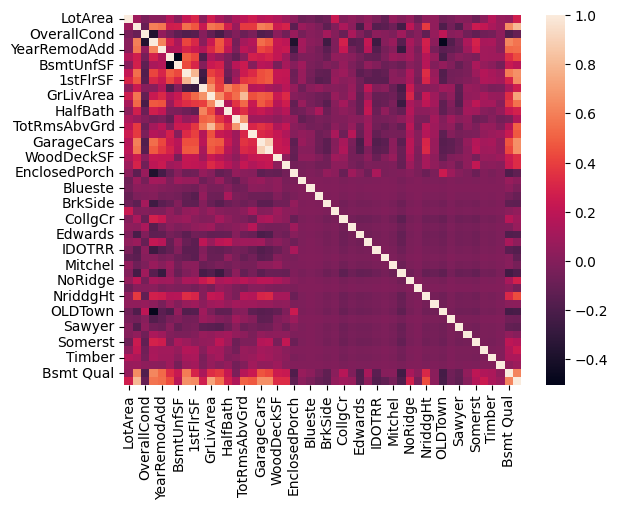

In [4]:
sns.heatmap(data.corr())

In [16]:
correlation=data.corr().where((data.corr()>0.6) | (data.corr()<-0.6), 0)

<AxesSubplot: >

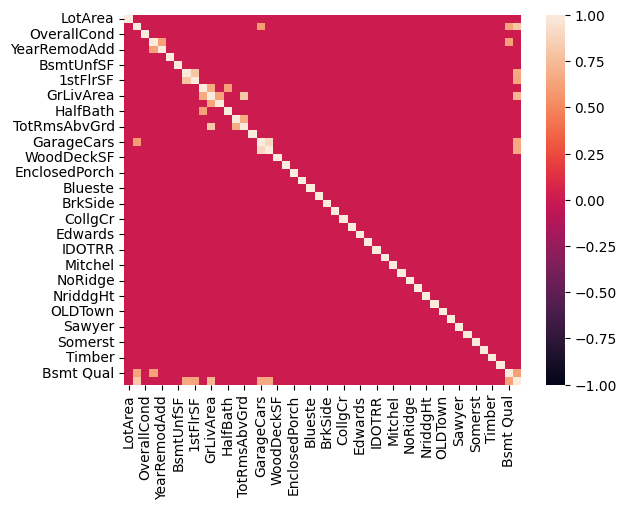

In [17]:
sns.heatmap(correlation, vmax=1,vmin=-1)

In [7]:
# First 1800 data items are training set; the next 600 are the validation set; the rest are the test set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]
test = data.iloc[2400:2908]

In [8]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val, X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val, y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

In [9]:
# Importing models
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

def train_and_validate(model):
    
    model.fit(X_train, y_train.values.ravel())

    pred_train = model.predict(X_train)
    pred_velid = model.predict(X_val)

    model_coeff = pd.DataFrame()
    model_coeff["Features"] = X_train.columns
    model_coeff['Coefs'] = pd.Series(model.coef_[0]) if model.coef_.shape[0] == 1 else pd.Series(model.coef_)

    return {'model': model, 'training_mse': mse(y_train, pred_train), 'validation_mse': mse(y_val,pred_velid), 'coefs_df':model_coeff}

def CV(algo_cv_class, algo_class, alphas):
    model_cv = algo_cv_class(alphas=alphas, cv=2).fit(X_train, y_train.values.ravel())
    model = algo_class(alpha=model_cv.alpha_)
    
    return train_and_validate(model=model)

def compare_models():
    print("Running Linear Regression...")
    results_lr = train_and_validate(LinearRegression())
    alphas = np.array([0.001, 0.005, 0.01, 0.03, 0.06, 0.1, 0.03, 1, 5, 10, 20])
    print("Running Ridge Regression...")
    results_ridge = CV(RidgeCV, Ridge, alphas*1800)
    print("Running Lasso Regression...")
    results_lasso = CV(LassoCV, Lasso, alphas)
    print("Running Elastic Net Regression...")
    results_elastic = CV(ElasticNetCV, ElasticNet, alphas)

    results_list = [results_lr, results_ridge, results_lasso, results_elastic]

    mse_comparison = pd.DataFrame(columns=['Training MSE', 'Validation MSE'], index=['LR', 'Ridge', 'Lasso', 'ENET'], data=[[res['training_mse'], res['validation_mse']] for res in results_list])
    mse_comparison.loc[:, 'Best Alpha'] = ['-', results_ridge['model'].alpha/1800, results_lasso['model'].alpha, results_elastic['model'].alpha]

    print(mse_comparison)
    mse_comparison.plot.bar()

    coeff_comparison = pd.DataFrame(columns=results_lr['coefs_df']['Features'], index=['LR', 'Ridge', 'Lasso', 'ENET'], data=[res['coefs_df']['Coefs'].values for res in results_list])
    coeff_comparison = coeff_comparison.T
    coeff_comparison_normalized = ((coeff_comparison - coeff_comparison.min()) / (coeff_comparison.max() - coeff_comparison.min())).T
    fig = plt.figure(figsize=(16,6))
    sns.heatmap(coeff_comparison_normalized, robust=True)
    coeff_comparison = coeff_comparison.T


    return [m['model'] for m in results_list]


Running Linear Regression...
Running Ridge Regression...
Running Lasso Regression...
Running Elastic Net Regression...
       Training MSE  Validation MSE Best Alpha
LR         0.114015        0.117028          -
Ridge      0.114977        0.117861       0.06
Lasso      0.117505        0.116827       0.01
ENET       0.120791        0.118610       0.03


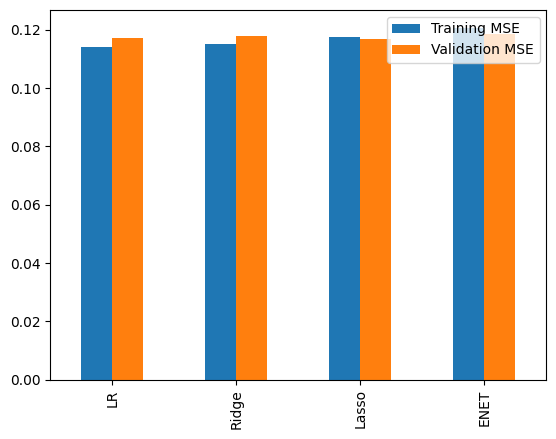

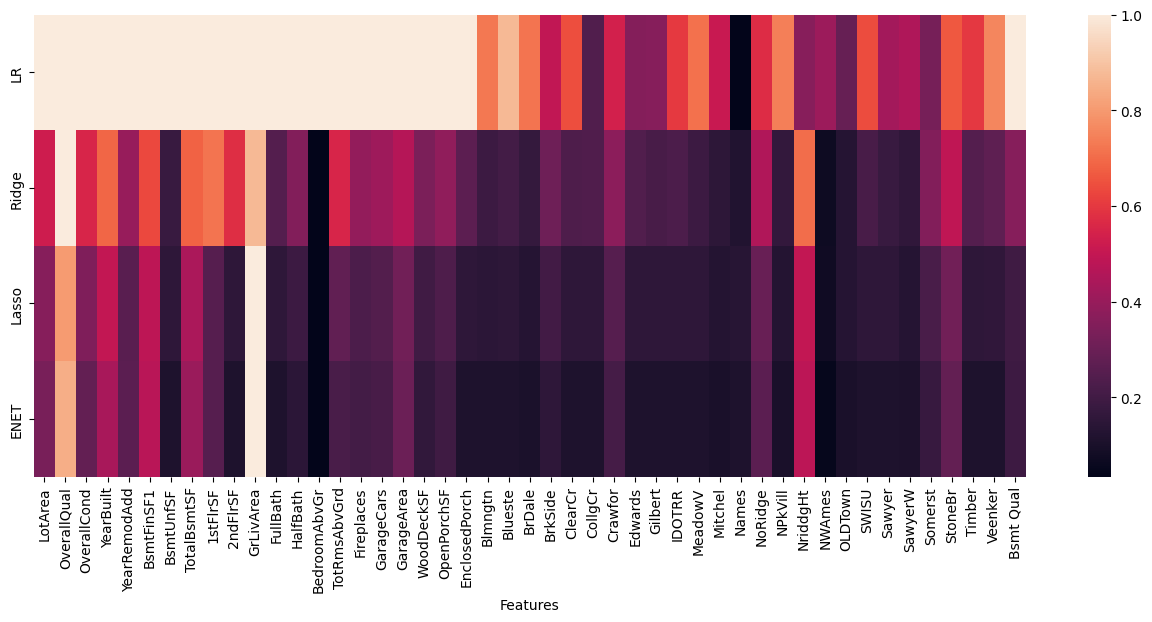

In [10]:
models = compare_models()

In [34]:
best_model = models[2] # lasso
pred_test = best_model.predict(X_test)
print('Test MSE :', round(mse(y_test,pred_test), 5))

Test MSE : 0.11999


In [36]:
print('Test RMSE:', round(mse(y_test,pred_test)**1/2, 5))
print(data['Sale Price'].describe()[['mean', 'std', 'min', 'max']])
print('R squared training set:', round(best_model.score(X_train, y_train), 3))
print('R squared validation set:', round(best_model.score(X_val, y_val), 3))
print('R squared test set:', round(best_model.score(X_test, y_test), 3))

Test RMSE: 0.06
mean   -0.007050
std     1.011872
min    -2.175895
max     5.752007
Name: Sale Price, dtype: float64
R squared training set: 0.882
R squared validation set: 0.896
R squared test set: 0.877


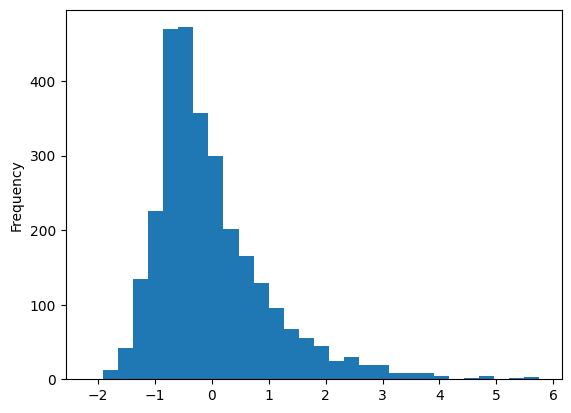

In [37]:
data['Sale Price'].plot.hist(bins=30);

<AxesSubplot: >

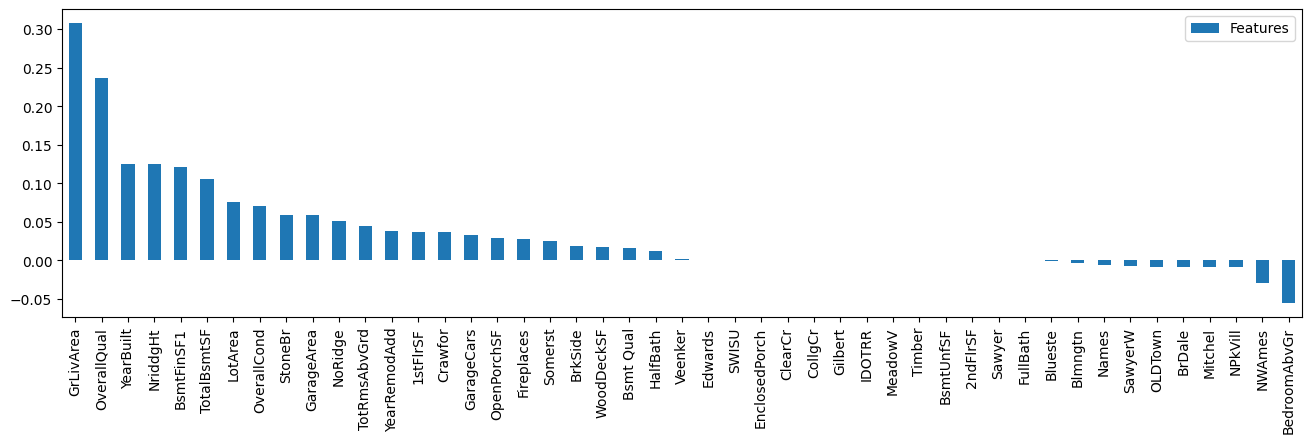

In [12]:
fig, ax = plt.subplots(figsize=(16,4))
features = pd.DataFrame(index=X_train.columns, data=best_model.coef_, columns=['Features']).sort_values(by='Features', ascending=False)
features.plot.bar(ax=ax)
